# Telco Customer Churn Prediction

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop("customerID",axis="columns",inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [8]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df["TotalCharges"].dtype

dtype('O')

In [10]:
df['TotalCharges'].value_counts().sort_index()

TotalCharges
          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6531, dtype: int64

In [11]:
df['TotalCharges']=np.where(df['TotalCharges']==" ",np.nan,df['TotalCharges'])
df['TotalCharges'].value_counts().sort_index()

TotalCharges
100.2     1
100.25    1
100.35    1
100.4     1
100.8     1
         ..
997.75    1
998.1     1
999.45    1
999.8     1
999.9     1
Name: count, Length: 6530, dtype: int64

In [12]:
df['TotalCharges'].isna().sum()
df['TotalCharges']=df['TotalCharges'].apply(float)

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df["TotalCharges"].mean())
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
num_col=df.select_dtypes(include=["int","float"]).columns.to_list()
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### EDA

In [17]:
d=df[df["Churn"]=="Yes"]['gender'].value_counts().to_frame().reset_index()
d

,gender,count
0,Female,939
1,Male,930


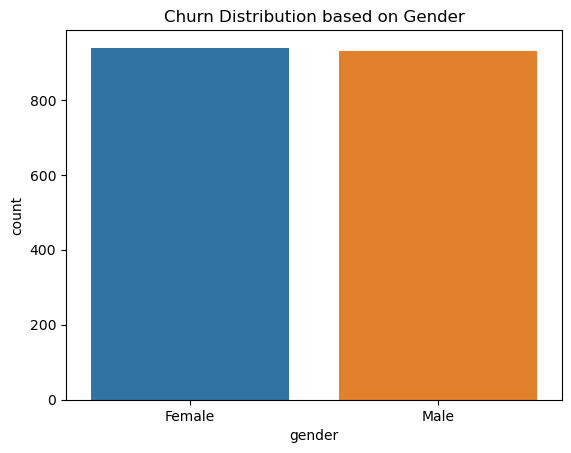

In [18]:
sns.barplot(x="gender",y='count',data=d,hue="gender")
plt.title("Churn Distribution based on Gender")
plt.show()

In [19]:
d=df[df["Churn"]=="Yes"]["Contract"].value_counts().to_frame().reset_index()
d

,Contract,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


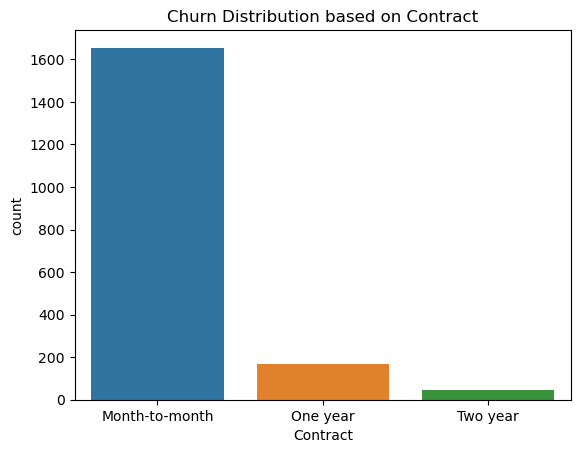

In [20]:
sns.barplot(x="Contract",y='count',data=d,hue="Contract")
plt.title("Churn Distribution based on Contract")
plt.show()

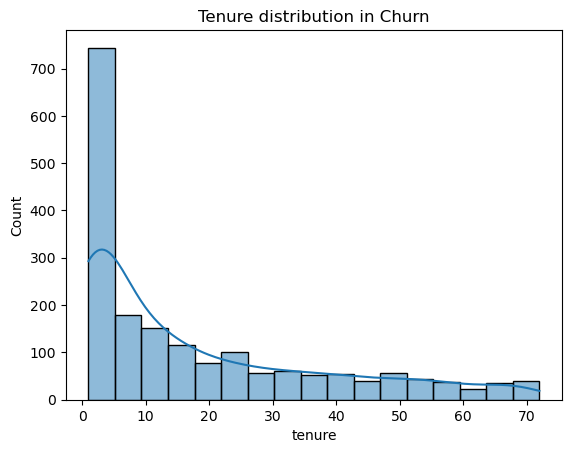

In [21]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="tenure",kde=True)
plt.title("Tenure distribution in Churn")
plt.show()

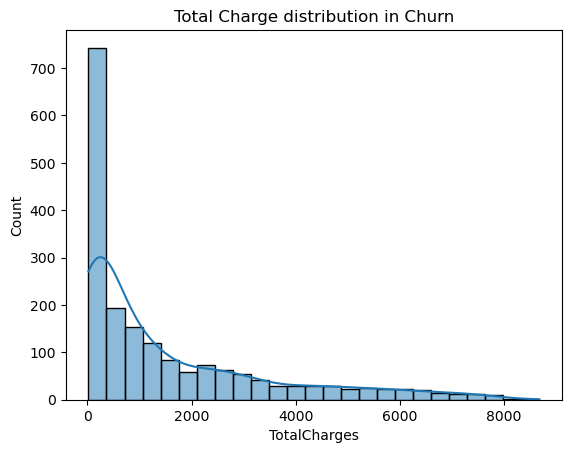

In [22]:
sns.histplot(data=df[df["Churn"]=="Yes"],x="TotalCharges",kde=True)
plt.title("Total Charge distribution in Churn")
plt.show()

In [23]:
d=df[df["Churn"]=="Yes"]["Partner"].value_counts().to_frame().reset_index()
d

,Partner,count
0,No,1200
1,Yes,669


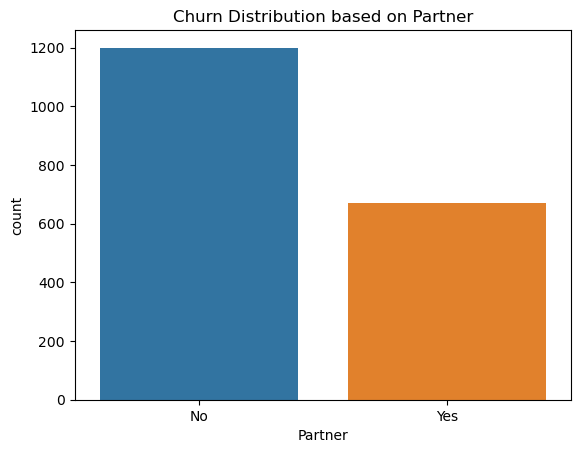

In [24]:
sns.barplot(x="Partner",y='count',data=d,hue="Partner")
plt.title("Churn Distribution based on Partner")
plt.show()

In [25]:
d=df[df["Churn"]=="Yes"]["SeniorCitizen"].value_counts().to_frame().reset_index()
d

,SeniorCitizen,count
0,0,1393
1,1,476


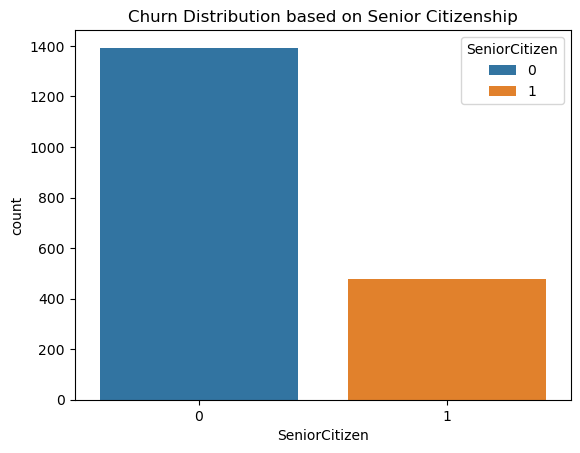

In [26]:
sns.barplot(x="SeniorCitizen",y='count',data=d,hue="SeniorCitizen")
plt.title("Churn Distribution based on Senior Citizenship")
plt.show()

In [27]:
d=df[df["Churn"]=="Yes"]["Dependents"].value_counts().to_frame().reset_index()
d

,Dependents,count
0,No,1543
1,Yes,326


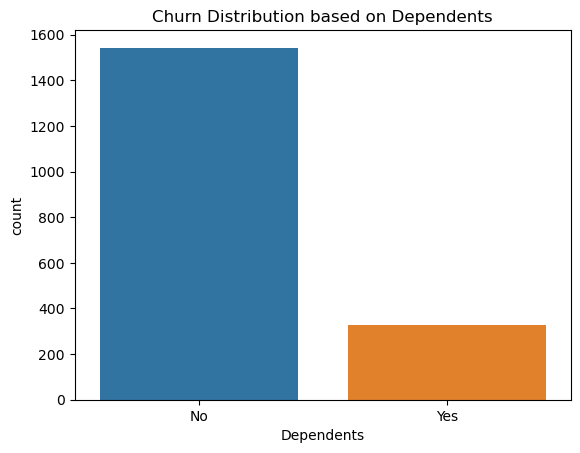

In [28]:
sns.barplot(x="Dependents",y='count',data=d,hue="Dependents")
plt.title("Churn Distribution based on Dependents")
plt.show()

In [29]:
yes_map={"No":0,"Yes":1}

for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
--
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
--
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
--
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
--
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Na

In [30]:
for aa in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[aa]=df[aa].replace({"No internet service":"No"})

In [31]:
for x in ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']:
    print("--")
    print(df[x].value_counts())

--
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
--
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
--
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
--
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
--
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
--
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
--
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
--
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [32]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [33]:
len(df)

7043

In [34]:
df['MultipleLines']=df["MultipleLines"].replace({"No phone service":"No"})

In [35]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [36]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [37]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [38]:
cat_col=df.select_dtypes(object).columns.to_list()
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [39]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [40]:
cat_col=df.select_dtypes(object).columns
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


## Scaling and Encoding Features

In [41]:
yes_map={"Yes":1,"No":0}

In [42]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

encode={} # To know which label maps which value

yes_col=[]

for a in cat_col:
    if a in ["gender","InternetService","Contract","PaymentMethod"]:
        df[a]=lab.fit_transform(df[[a]])
        encode[a]=dict(zip(lab.classes_,lab.transform(lab.classes_)))
    else:
        df[a]=df[a].map(yes_map)
        yes_col.append(a)


df

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-v

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [43]:
encode

{'gender': {'Female': 0, 'Male': 1},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [44]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [46]:
x=df.drop("Churn",axis="columns")
y=df['Churn']

In [47]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,stratify=y)

In [49]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    3880
 1    1402
 Name: count, dtype: int64,
 Churn
 0    1294
 1     467
 Name: count, dtype: int64)

In [50]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2171,0,0,0,0,2,1,0,0,0,0,1,0,0,1,0,0,2,60.85,111.40
4906,0,0,1,1,72,1,1,1,1,1,0,0,1,0,2,1,0,95.90,6954.15
1293,1,0,1,1,67,1,1,1,0,1,1,1,1,1,2,1,0,111.20,7530.80
6243,0,0,1,1,72,1,1,0,1,1,1,0,1,1,2,1,1,83.60,5959.30
1030,0,0,1,1,50,1,0,1,0,0,0,0,0,0,0,1,0,69.75,3557.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,2,74.50,74.50
6443,0,0,0,0,9,1,0,2,0,0,0,0,0,0,0,0,0,19.50,150.35
1181,1,1,0,0,21,1,0,0,0,0,1,0,1,0,0,1,0,60.05,1236.15
3659,1,0,1,0,67,1,1,1,1,1,1,0,1,1,1,0,1,109.90,7332.40


#### Model driven Feature Extraction

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42)

xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [53]:
y_sample=xgb.predict_proba(x_test)[:,1]

roc_auc_score(y_test,y_sample)

0.8121919979877478

In [54]:
y_sample=xgb.predict(x_test)
accuracy_score(y_test,y_sample)

0.7859170925610448

In [55]:
# Extracting Importance of features
xgb.feature_importances_

array([0.01812822, 0.02916719, 0.01787386, 0.01888989, 0.03552595,
       0.06507652, 0.02375882, 0.10704104, 0.0273529 , 0.02393582,
       0.02116684, 0.03245623, 0.01943807, 0.01980646, 0.44372025,
       0.02474123, 0.02184564, 0.02837624, 0.02169877], dtype=float32)

In [56]:
imp=pd.DataFrame({"columns":x_train.columns,"importance":xgb.feature_importances_}).sort_values(by="importance",ascending=False)
imp

,columns,importance
14,Contract,0.443720
7,InternetService,0.107041
5,PhoneService,0.065077
4,tenure,0.035526
11,TechSupport,0.032456
1,SeniorCitizen,0.029167
17,MonthlyCharges,0.028376
8,OnlineSecurity,0.027353
15,PaperlessBilling,0.024741
9,OnlineBackup,0.023936


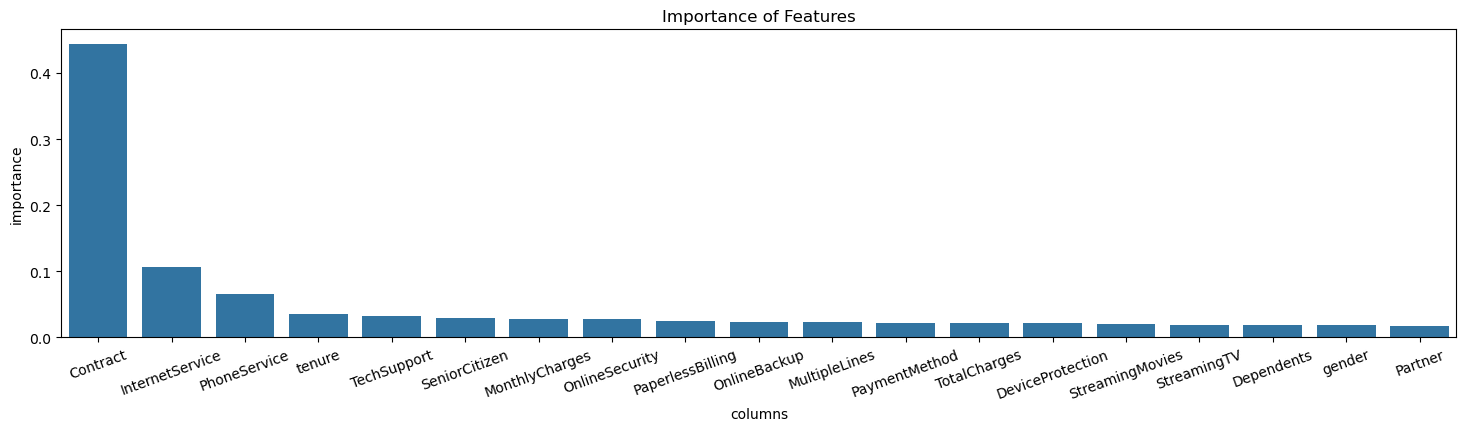

In [57]:
plt.figure(figsize=(18,4))
sns.barplot(x=imp['columns'],y=imp['importance'])
plt.title("Importance of Features")
plt.xticks(rotation=20)
plt.show()

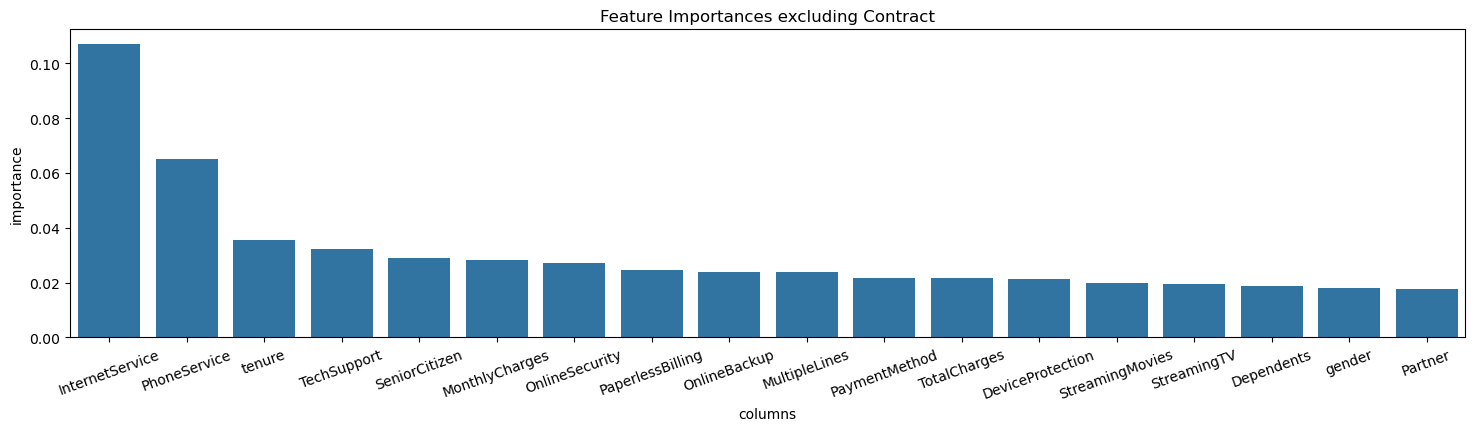

In [58]:
plt.figure(figsize=(18,4))
sns.barplot(x='columns',y='importance',data=imp[imp['columns']!="Contract"])
plt.xticks(rotation=20)
plt.title("Feature Importances excluding Contract")
plt.show()

In [59]:
imp["Cummulative Sum"]=imp["importance"].cumsum()/imp["importance"].sum()
imp

,columns,importance,Cummulative Sum
14,Contract,0.443720,0.443720
7,InternetService,0.107041,0.550761
5,PhoneService,0.065077,0.615838
4,tenure,0.035526,0.651364
11,TechSupport,0.032456,0.683820
1,SeniorCitizen,0.029167,0.712987
17,MonthlyCharges,0.028376,0.741363
8,OnlineSecurity,0.027353,0.768716
15,PaperlessBilling,0.024741,0.793458
9,OnlineBackup,0.023936,0.817393


In [60]:
len(imp)

19

In [61]:
features=imp[imp["Cummulative Sum"]<=0.91]["columns"].values
features

array(['Contract', 'InternetService', 'PhoneService', 'tenure',
       'TechSupport', 'SeniorCitizen', 'MonthlyCharges', 'OnlineSecurity',
       'PaperlessBilling', 'OnlineBackup', 'MultipleLines',
       'PaymentMethod', 'TotalCharges', 'DeviceProtection'], dtype=object)

In [62]:
x_train_features=x_train[features]
x_train_features

,Contract,InternetService,PhoneService,tenure,TechSupport,SeniorCitizen,MonthlyCharges,OnlineSecurity,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,TotalCharges,DeviceProtection
2171,0,0,1,2,0,0,60.85,0,0,0,0,2,111.40,1
4906,2,1,1,72,0,0,95.90,1,1,1,1,0,6954.15,0
1293,2,1,1,67,1,0,111.20,0,1,1,1,0,7530.80,1
6243,2,0,1,72,0,0,83.60,1,1,1,1,1,5959.30,1
1030,0,1,1,50,0,0,69.75,0,1,0,0,0,3557.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,0,1,1,1,0,0,74.50,0,1,0,1,2,74.50,0
6443,0,2,1,9,0,0,19.50,0,0,0,0,0,150.35,0
1181,0,0,1,21,0,1,60.05,0,1,0,0,0,1236.15,1
3659,1,1,1,67,0,0,109.90,1,0,1,1,1,7332.40,1


In [63]:
x_test_features=x_test[features]
x_test_features

,Contract,InternetService,PhoneService,tenure,TechSupport,SeniorCitizen,MonthlyCharges,OnlineSecurity,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,TotalCharges,DeviceProtection
1064,1,0,1,14,1,0,55.70,1,0,0,0,3,795.15,0
5954,0,0,0,20,1,0,55.00,1,1,1,0,1,1165.55,1
1864,1,0,1,26,0,1,60.70,0,0,0,0,3,1597.40,1
650,0,1,1,3,0,0,69.55,0,1,0,0,0,222.30,0
5118,0,1,1,42,1,0,85.90,0,1,0,1,1,3729.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2,2,1,62,0,0,24.25,0,1,0,1,0,1424.60,0
2605,2,2,1,13,0,0,20.40,0,1,0,0,3,261.30,0
2727,0,1,1,5,0,0,94.85,0,1,0,1,0,462.80,0
1086,0,1,1,11,0,1,89.70,0,0,0,0,0,1047.70,0


## Oversampling minority class

In [64]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")

x_sm,y_sm=smote.fit_resample(x_train_features,y_train)

In [65]:
y_train.value_counts(),y_sm.value_counts()

(Churn
 0    3880
 1    1402
 Name: count, dtype: int64,
 Churn
 0    3880
 1    3880
 Name: count, dtype: int64)

In [66]:
print("Before SMOTE: ",len(x_train_features)," After SMOTE: ",len(x_sm))

Before SMOTE:  5282  After SMOTE:  7760


# Model Training

In [67]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from lightgbm import LGBMClassifier

In [68]:
def all_models(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    y_score=classifier.predict_proba(x_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    print("Accuracy score:", acc)
    print("AUC score:", auc)
    return acc, auc

In [69]:
models=[DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(random_state=42),BaggingClassifier(random_state=42),XGBClassifier(random_state=42),LGBMClassifier(random_state=42)]

acu,auc=[],[]
for model in models:
    print(model)
    ac,au=all_models(model,x_sm,x_test_features,y_sm,y_test)
    acu.append(ac)
    auc.append(au)

results={}
results["models"]=["DT","RF","GBC","ABC","BC","XGBC","LGBMC"]
results['accuracy_score']=acu
results["auc_score"]=auc
results=pd.DataFrame(results)

DecisionTreeClassifier(random_state=42)
Accuracy score: 0.7331061896649631
AUC score: 0.6842716672899793
RandomForestClassifier(random_state=42)
Accuracy score: 0.771152754116979
AUC score: 0.820006023518198
GradientBoostingClassifier(random_state=42)
Accuracy score: 0.7705848949460534
AUC score: 0.8357044041184978
AdaBoostClassifier(random_state=42)
Accuracy score: 0.7563884156729132
AUC score: 0.8332585909600894
BaggingClassifier(random_state=42)
Accuracy score: 0.7666098807495741
AUC score: 0.7910443191935104
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,


Selecting Best Model

In [70]:
results.sort_values(by="accuracy_score",ascending=False)

,models,accuracy_score,auc_score
6,LGBMC,0.777967,0.828753
1,RF,0.771153,0.820006
2,GBC,0.770585,0.835704
4,BC,0.766610,0.791044
5,XGBC,0.766042,0.818321
3,ABC,0.756388,0.833259
0,DT,0.733106,0.684272


In [71]:
# Selecting the best Model based on discriminative power
best_model=LGBMClassifier(random_state=42)
best_model.fit(x_sm,y_sm)

[LightGBM] [Info] Number of positive: 3880, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 7760, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


# Evaluation of Best model

In [72]:
y_pred=best_model.predict(x_test_features)
y_proba=best_model.predict_proba(x_test_features)[:,1]

print("Final Metrics")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Auc     : {roc_auc_score(y_test,y_proba)}")

Final Metrics
Accuracy: 0.7779670641680864
Auc     : 0.8287525360004501


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1294
           1       0.57      0.67      0.61       467

    accuracy                           0.78      1761
   macro avg       0.72      0.74      0.73      1761
weighted avg       0.79      0.78      0.78      1761



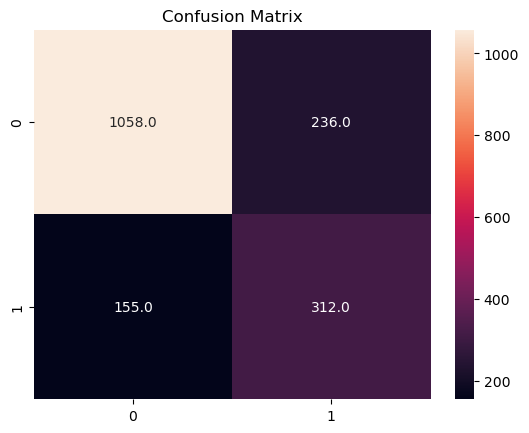

In [74]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".1f")
plt.title("Confusion Matrix")
plt.show()

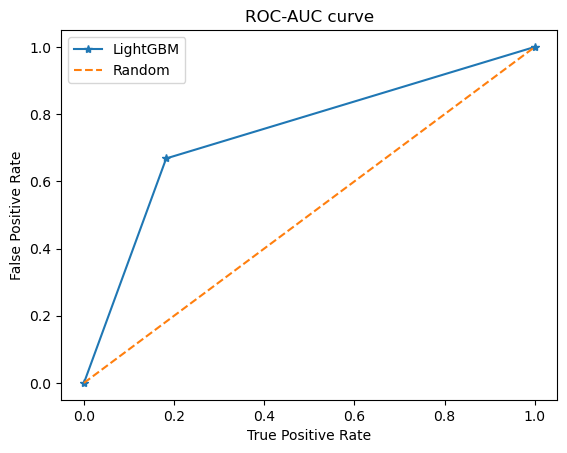

In [89]:
fpr,tpr,threshhold=roc_curve(y_test,y_pred)

plt.plot(fpr,tpr, label="LightGBM",marker="*")
plt.plot([0,1],[0,1],label="Random",linestyle="--")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC-AUC curve")
plt.legend()
plt.show()

## Threshold tuning

In [95]:
from sklearn.metrics import f1_score,precision_score,recall_score

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


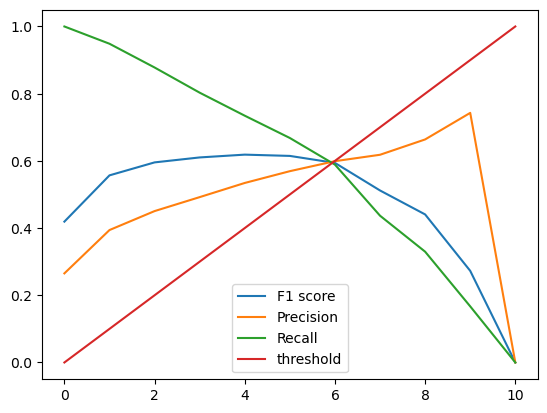

In [108]:
f1=[]
pre=[]
re=[]
lim=[]

for t in np.arange(0.0, 1.01, 0.1):
    y_thresh=(y_proba>=t).astype(int)
    f1.append(f1_score(y_test,y_thresh))
    pre.append(precision_score(y_test,y_thresh))
    re.append(recall_score(y_test,y_thresh))
    lim.append(t)

plt.plot(f1,label="F1 score")
plt.plot(pre,label="Precision")
plt.plot(re,label="Recall")
plt.plot(np.arange(0.0,1.01,0.1),label="threshold")
plt.legend()
plt.show()


In [109]:
lim[np.argmax(f1)]

0.4

In [110]:
y_actual=(y_proba>=0.4).astype(int)

print(classification_report(y_test,y_actual))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1294
           1       0.53      0.73      0.62       467

    accuracy                           0.76      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.80      0.76      0.77      1761



In [75]:
x_train_features

,Contract,InternetService,PhoneService,tenure,TechSupport,SeniorCitizen,MonthlyCharges,OnlineSecurity,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,TotalCharges,DeviceProtection
2171,0,0,1,2,0,0,60.85,0,0,0,0,2,111.40,1
4906,2,1,1,72,0,0,95.90,1,1,1,1,0,6954.15,0
1293,2,1,1,67,1,0,111.20,0,1,1,1,0,7530.80,1
6243,2,0,1,72,0,0,83.60,1,1,1,1,1,5959.30,1
1030,0,1,1,50,0,0,69.75,0,1,0,0,0,3557.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,0,1,1,1,0,0,74.50,0,1,0,1,2,74.50,0
6443,0,2,1,9,0,0,19.50,0,0,0,0,0,150.35,0
1181,0,0,1,21,0,1,60.05,0,1,0,0,0,1236.15,1
3659,1,1,1,67,0,0,109.90,1,0,1,1,1,7332.40,1


In [111]:
rev=x_train_features.columns.tolist()
rev

['Contract',
 'InternetService',
 'PhoneService',
 'tenure',
 'TechSupport',
 'SeniorCitizen',
 'MonthlyCharges',
 'OnlineSecurity',
 'PaperlessBilling',
 'OnlineBackup',
 'MultipleLines',
 'PaymentMethod',
 'TotalCharges',
 'DeviceProtection']

In [112]:
encode

{'gender': {'Female': 0, 'Male': 1},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [113]:
yes_col

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [114]:
rev

['Contract',
 'InternetService',
 'PhoneService',
 'tenure',
 'TechSupport',
 'SeniorCitizen',
 'MonthlyCharges',
 'OnlineSecurity',
 'PaperlessBilling',
 'OnlineBackup',
 'MultipleLines',
 'PaymentMethod',
 'TotalCharges',
 'DeviceProtection']

In [115]:
import joblib # Exporting required variables and models for development

joblib.dump(rev,"feature_names.pkl")
joblib.dump(encode,"label_encoding.pkl")
joblib.dump(yes_col,"yes_col_names.pkl")
joblib.dump(best_model,"best_churn_model.pkl")

['best_churn_model.pkl']

In [118]:
x_test_features[y_actual==0]

,Contract,InternetService,PhoneService,tenure,TechSupport,SeniorCitizen,MonthlyCharges,OnlineSecurity,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,TotalCharges,DeviceProtection
1064,1,0,1,14,1,0,55.70,1,0,0,0,3,795.15,0
1864,1,0,1,26,0,1,60.70,0,0,0,0,3,1597.40,1
5118,0,1,1,42,1,0,85.90,0,1,0,1,1,3729.75,1
1263,0,1,1,68,0,1,89.60,0,1,1,1,0,6127.60,0
6201,0,1,1,5,0,1,80.70,1,0,1,0,2,374.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2,0,1,66,1,0,84.00,1,1,0,1,3,5714.25,1
3369,0,0,1,11,0,1,55.60,1,1,0,1,2,580.80,0
73,2,2,1,62,0,0,24.25,0,1,0,1,0,1424.60,0
2605,2,2,1,13,0,0,20.40,0,1,0,0,3,261.30,0


In [119]:
x_test_features[y_actual==1]

,Contract,InternetService,PhoneService,tenure,TechSupport,SeniorCitizen,MonthlyCharges,OnlineSecurity,PaperlessBilling,OnlineBackup,MultipleLines,PaymentMethod,TotalCharges,DeviceProtection
5954,0,0,0,20,1,0,55.00,1,1,1,0,1,1165.55,1
650,0,1,1,3,0,0,69.55,0,1,0,0,0,222.30,0
6111,0,1,1,40,0,0,83.85,0,0,0,1,0,3532.25,0
2612,0,0,1,14,1,0,80.45,0,0,1,1,1,1137.05,0
4056,0,0,0,3,0,0,50.60,0,1,1,0,2,155.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,0,1,1,23,1,0,96.90,0,1,0,1,1,2085.45,1
6703,0,0,0,2,0,0,45.25,0,1,0,0,2,85.50,0
680,0,1,1,1,0,0,80.00,0,0,0,0,2,80.00,0
2727,0,1,1,5,0,0,94.85,0,1,0,1,0,462.80,0
